In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig



#low-pass filter
def lpf(x):
	y = x.copy()
	
	for n in x.index:
		if(n < 12):
			continue
		y.iloc[n,1] = 2*y.iloc[n-1,1] - y.iloc[n-2,1] + x.iloc[n,1] - 2*x.iloc[n-6,1] + x.iloc[n-12,1] 
	return y


#high-pass filter
def hpf(x):
	y = x.copy()
	
	for n in x.index:
		if(n < 32):
			continue
		y.iloc[n,1] = y.iloc[n-1,1] - x.iloc[n,1]/32 + x.iloc[n-16,1] - x.iloc[n-17,1] + x.iloc[n-32,1]/32
	return y

#defivative of signal
def deriv(x):
	y = x.copy()

	for n in x.index:
		if(n < 4):
			continue
		y.iloc[n, 1] = (2*x.iloc[n,1] + x.iloc[n-1,1] - x.iloc[n-3,1] - 2*x.iloc[n-4,1])/4
	return y

#squarring the signal
def squaring(x):
	y = x.copy()

	for n in x.index:
		y.iloc[n,1] = x.iloc[n,1]**2
	return y

#integral of the signal for a moving window of ws size.
def win_sum(x, ws):
	y = x.copy()
	l = int(ws/2)
	
	for n in x.index:
		tmp_sum = 0
		
		if(n > 933-l):
			break

		if(n < l):
			continue
		for j in range(n-l,n+l+1):
			tmp_sum += x.iloc[j,1]
		y.iloc[n,1] = tmp_sum/(l+1)		
	return y

def detection(x):
	y = x.copy()

ecg = pd.read_csv('ecg_data.csv')

#Application of lpf
f1 = lpf(ecg)
#Application of hpf
f2 = hpf(f1)
#Application of the derivative
f3 = deriv(f2)
#squaring signal
f4 = squaring(f3)

window_size = 22 
f5 = win_sum(f4, window_size)

## Original Signal

Text(0, 0.5, 'mV')

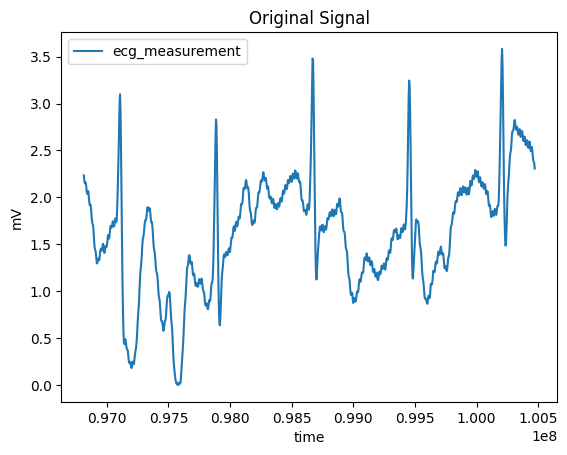

In [2]:
ecg.set_index('timestamp').plot()
plt.title('Original Signal')
plt.xlabel('time')
plt.ylabel('mV')

##  Bandpass Filtering(both high-pass and low-pass)

[]

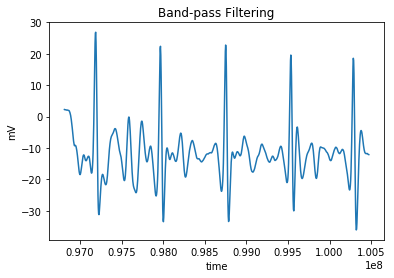

In [22]:
plt.plot(f2.iloc[:,0], f2.iloc[:,1])
plt.title('Band-pass Filtering')
plt.xlabel('time')
plt.ylabel('mV')
plt.plot()

## Taking Derivative

Text(0,0.5,'mV')

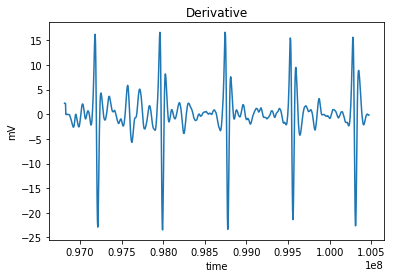

In [23]:
plt.plot(f3.iloc[:,0], f3.iloc[:,1])
plt.title('Derivative')
plt.xlabel('time')
plt.ylabel('mV')

Text(0,0.5,'mV')

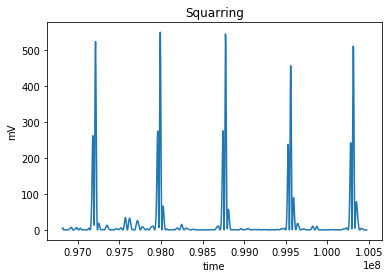

In [24]:
plt.plot(f4.iloc[:,0], f4.iloc[:,1])
plt.title('Squarring')
plt.xlabel('time')
plt.ylabel('mV')

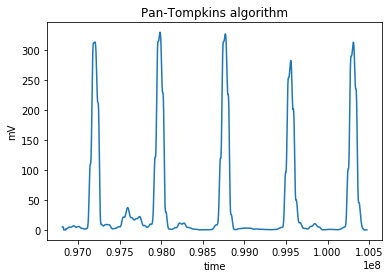

In [25]:
plt.plot(f5.iloc[:,0], f5.iloc[:,1])
plt.title('Pan-Tompkins algorithm')
plt.xlabel('time')
plt.ylabel('mV')
plt.show()